# **MPA-MLF - Miniproject**
Classification of wireless transmitters.
Task is to determine the number of wireless transmitters based on the hardware imperfections. You
are provided with the dataset. The dataset consists of 19200 samples and 9 features in total. The features represent
the main radio frequency impairments.

## Clustering using libraries


### Importing libraries

In [ ]:
!pip install kneed

In [ ]:
from kneed import KneeLocator
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import pandas as pd
import matplotlib.pyplot as plt
import warnings
from IPython.display import clear_output

### Preprocessing

In [ ]:
data_path = 'https://raw.githubusercontent.com/VojtechNiederle/MPC-MLF/main/Miniprojekt/Data_prepared_final.csv'
data = pd.read_csv(data_path).iloc[:, 2:].values

scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)

### Clustering

In [ ]:
warnings.filterwarnings('ignore')

all_objective = []
k_all = range(1, 80)

for k in k_all:
  print("progress: k:",k)
  clear_output(wait=True)

  kmeans = KMeans(n_clusters=k)
  kmeans.fit(data_scaled)
  all_objective.append(kmeans.inertia_)

print("progress: Done")

progress: Done


### Knee location

In [ ]:
kneedle = KneeLocator(k_all, all_objective,S=0.1, curve='convex', direction='decreasing')
print("Number of transmitters:",kneedle.knee)

Number of transmitters: 9


### Cluster plot (result)

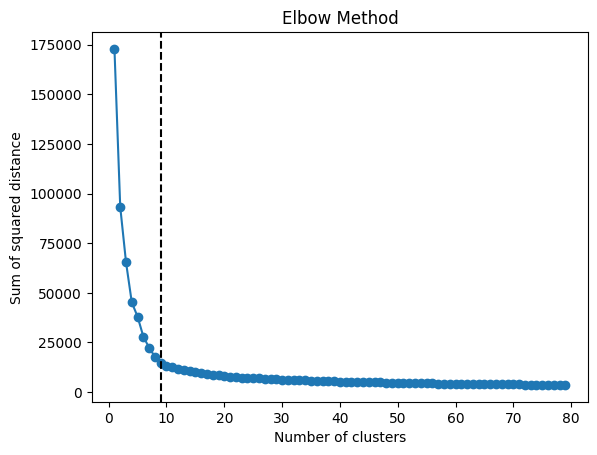

In [ ]:
plt.figure()
plt.plot(k_all, all_objective, marker='o')
plt.axvline(kneedle.knee, color='black', linestyle='--', label='Knee Point')
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('Sum of squared distance')
plt.show()

## Clustering using functions from PC labs


### Importing libraries

In [ ]:
!pip install kneed

In [ ]:
from kneed import KneeLocator
import pandas as pd
from sklearn.preprocessing import StandardScaler
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import clear_output
import numpy as np

### Function Definitions

In [ ]:
def initialize_clusters(points: np.array, k_clusters: int) -> np.array:
    index = np.arange(points.shape[0])
    np.random.shuffle(index)
    req_index = index[:k_clusters]
    m_points = points[req_index]
    return m_points

In [ ]:
def calculate_metric(points: np.array, centroid: np.array) -> np.array:
    distances_array = np.square(np.linalg.norm(points-centroid, axis=1))
    return distances_array

In [ ]:
def compute_distances(points: np.array, centroids_points: np.array) -> np.array:
    distances_array = np.asarray([calculate_metric(points, centroid) for centroid in centroids_points])
    return distances_array

In [ ]:
def assign_centroids(distances: np.array) -> np.array:
    assigned_centroids = np.argmin(distances, axis=0)
    return assigned_centroids

In [ ]:
def calculate_objective(assigned_centroids: np.array, distances: np.array) -> np.array:
    objective_function_value = np.sum(distances.T[np.arange(len(distances.T)), assigned_centroids])
    return objective_function_value

In [ ]:
def calculate_new_centroids(points: np.array, assigned_centroids: np.array, k_clusters: int) -> np.array:
    new_clusters = []
    for cluster_id in range(k_clusters):
        j = np.where(assigned_centroids == cluster_id)
        points_sel = points[j]
        new_clusters.append(np.mean(points_sel, axis=0))
    new_clusters = np.array(new_clusters)
    return new_clusters

In [ ]:
def fit(points: np.array, k_clusters: int, n_of_oterations: int, error: float = 0.001) -> tuple:
    centroid_points = initialize_clusters(points, k_clusters)
    last_objective = 10000.0

    for _ in range(n_of_oterations):
        distance = compute_distances(points, centroid_points)
        cluster_belong = np.argmin(distance, axis=0)

        objective = calculate_objective(cluster_belong, distance)

        if abs(last_objective - objective) < error:
            break

        last_objective = objective
        centroid_points = calculate_new_centroids(points, cluster_belong, k_clusters)

    return centroid_points, last_objective

### Preprocessing

In [ ]:
data_path = 'https://raw.githubusercontent.com/VojtechNiederle/MPC-MLF/main/Miniprojekt/Data_prepared_final.csv'
data = pd.read_csv(data_path).iloc[:, 2:].values

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)

### Clustering

In [ ]:
k_all = range(1, 80)
all_objective = []

for k in k_all:
  print("progress: k:",k)
  clear_output(wait=True)

  a, b = fit(data_scaled,k,1000)
  all_objective.append(b)

print("progress: Done")

progress: Done


### Knee location

In [ ]:
kneedle = KneeLocator(k_all, all_objective,S=1, curve='convex', direction='decreasing')
print("Number of transmitters:",kneedle.knee)

Number of transmitters: 8


### Cluster plot (result)

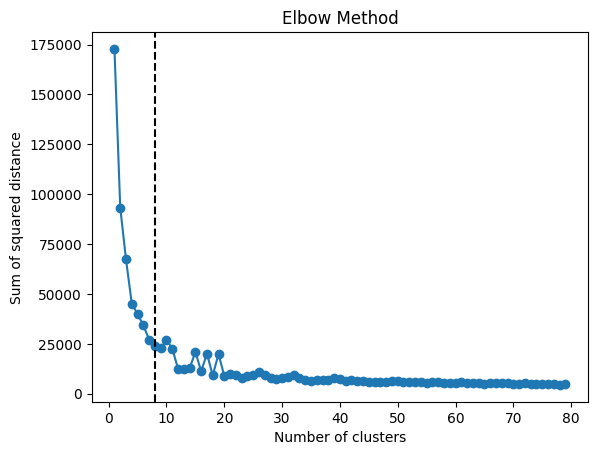

In [ ]:
plt.figure()
plt.plot(k_all, all_objective, marker='o')
plt.axvline(kneedle.knee, color='black', linestyle='--', label='Knee Point')
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('Sum of squared distance')
plt.show()